# Przetwarzanie wstępne. Filtracja kontekstowa.


### Cel:
- zapoznanie z pojęciem kontekstu / filtracji kontekstowej,
- zapoznanie z pojęciem konwolucji (splotu),
- zapoznanie z wybranymi filtrami:
	- filtry liniowe dolnoprzepustowe:
		- filtr uśredniający,
		- filtr Gaussa.
	- filtry nielinowe:
		- mediana,
		- mediana dla obrazów kolorowych.
	- filtry liniowe górnoprzepustowe:
			- laplasjan,
			- operator Robersta, Prewitta, Sobela.
- zadanie domowe: adaptacyjna filtracja medianowa.

### Filtry liniowe uśredniające (dolnoprzepustowe)

Jest to podstawowa rodzina filtrów stosowana w cyfrowym przetwarzaniu obrazów. 
Wykorzystuje się je w celu "rozmazania" obrazu i tym samym redukcji szumów (zakłóceń) na obrazie.
Filtr określony jest przez dwa parametry: rozmiar maski (ang. _kernel_) oraz wartości współczynników maski.

Warto zwrócić uwagę, że omawiane w niniejszym rozdziale operacje generują nową wartość piksela na podstawie pewnego fragmentu obrazu (tj. kontekstu), a nie jak operacje punktowe tylko na podstawie jednego piksela.


1. Wczytaj obraz _plansza.png_.
W dalszej części ćwiczenia sprawdzenie działania filtracji dla innych obrazów sprowadzi się do wczytania innego pliku.

2. Podstawowa funkcja to `cv2.filter2D`  - realizacja filtracji konwolucyjnej.
   Proszę sprawdzić jej dokumentację i zwrócić uwagę na obsługę problemu brzegowego (na krawędziach istnieją piksele dla których nie da się wyznaczyć otoczenia).

  Uwaga. Problem ten można też rozwiązać z użyciem funkcji `signal.convolve2d` z biblioteki _scipy_ (`from scipy import signal`).

3. Stwórz podstawowy filtr uśredniający o rozmiarze $3 \times 3$ -- za pomocą funkcji `np.ones`. Wykonaj konwolucję na wczytanym obrazie. Na wspólnym rysunku wyświetl obraz oryginalny, po filtracji oraz moduł z różnicy.

4. Przeanalizuj otrzymane wyniki. Jakie elementy zawiera obraz "moduł z różnicy"? Co na tej podstawie można powiedzieć o filtracji dolnoprzepustowej?

In [75]:
import matplotlib.pyplot as plt
import cv2
import os
import wget
import numpy as np
from scipy import signal


# Obrazki
if not os.path.exists("jet.png") :
    wget.download('https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/jet.png') #--no-check-certificate
if not os.path.exists("kw.png") :
    wget.download('https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/kw.png') #--no-check-certificate
if not os.path.exists("moon.png") :
    wget.download('https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/moon.png') #--no-check-certificate
if not os.path.exists("lenaSzum.png") :
    wget.download('https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lenaSzum.png') #--no-check-certificate
if not os.path.exists("lena.png") :
    wget.download('https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lena.png') #--no-check-certificate
if not os.path.exists("plansza.png") :
    wget.download('https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/plansza.png') #--no-check-certificate


(-0.5, 499.5, 499.5, -0.5)

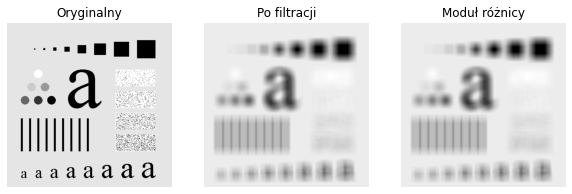

In [76]:
def lowpass_filter(src, kernel_x, kernel_y, kern = []):
    if len(kern) == 0:
        kernel = np.ones((kernel_x, kernel_y))
    else:
        kernel = kern
    return signal.convolve2d(src, kernel, 'same', 'symm')

plansza = cv2.imread('plansza.png', cv2.IMREAD_GRAYSCALE)
plansza_filtered = lowpass_filter(plansza, 30, 30)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 20))
ax1.imshow(plansza, 'gray')
ax1.set_title('Oryginalny')
ax1.axis('off')
ax2.imshow(plansza_filtered, 'gray')
ax2.set_title('Po filtracji')
ax2.axis('off')
ax3.imshow(np.abs(plansza - plansza_filtered), 'gray')
ax3.set_title('Moduł różnicy')
ax3.axis('off')

5. Na wspólnym rysunku wyświetl wyniki filtracji uśredniającej z oknem o rozmiarze 3, 5, 9, 15 i 35. 
Wykorzystaj polecenie `plt.subplot`. 
Przeanalizuj wpływ rozmiaru maski na wynik. 

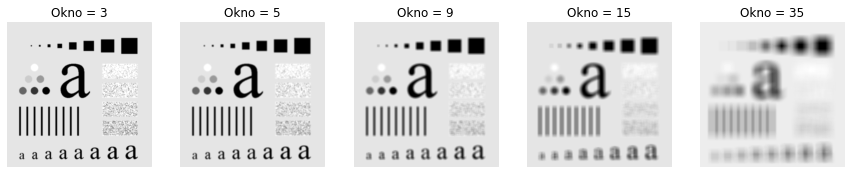

In [77]:
fig, axes = plt.subplots(1, 5, figsize = (15, 30))
sizes = [3, 5, 9, 15, 35]
for i in range(len(sizes)):
    dst = lowpass_filter(plansza, sizes[i], sizes[i])
    axes[i].imshow(dst, 'gray')
    axes[i].set_title(f'Okno = {sizes[i]}')
    axes[i].axis('off')

6. Wczytaj obraz _lena.png_.
Zaobserwuj efekty filtracji dolnoprzepustowej dla obrazu rzeczywistego.

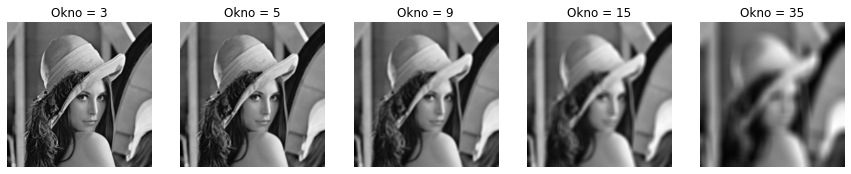

In [78]:
lena = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
fig, axes = plt.subplots(1, 5, figsize = (15, 30))
for i in range(len(sizes)):
    dst = lowpass_filter(lena, sizes[i], sizes[i])
    axes[i].imshow(dst, 'gray')
    axes[i].set_title(f'Okno = {sizes[i]}')
    axes[i].axis('off')

7. Niekorzystny efekt towarzyszący wykonanym filtracjom dolnoprzepustowym to utrata ostrości. 
Częściowo można go zniwelować poprzez odpowiedni dobór maski. 
Wykorzystaj maskę:  `M = np.array([1 2 1; 2 4 2; 1 2 1])`. 
Przed obliczeniami należy jeszcze wykonać normalizację - podzielić każdy element maski przez sumę wszystkich elementów: `M = M/sum(sum(M));`.
Tak przygotowaną maskę wykorzystaj w konwolucji - wyświetl wyniki tak jak wcześniej.
Możliwe jest też wykorzystywanie innych masek - współczynniki można dopasowywać do konkretnego problemu.

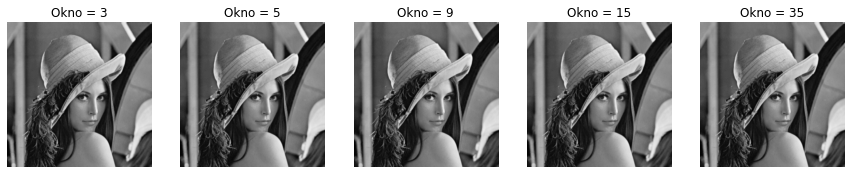

In [79]:
M = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
M = M/sum(sum(M))
fig, axes = plt.subplots(1, 5, figsize = (15, 30))
for i in range(len(sizes)):
    dst = lowpass_filter(lena, sizes[i], sizes[i], M)
    axes[i].imshow(dst, 'gray')
    axes[i].set_title(f'Okno = {sizes[i]}')
    axes[i].axis('off')

8. Skuteczną i często wykorzystywaną maską jest tzw. maska Gasussa.
Jest to zbiór liczb, które aproksymują dwuwymiarowy rozkład Gaussa. 
Parametrem jest odchylenie standardowe i rozmiar maski.

9. Wykorzystując przygotowaną funkcję `fgaussian` stwórz maskę o rozmiarze $5 \times 5$ i odchyleniu standardowym 0.5.
  Wykorzystując funkcję `mesh` zwizualizuj filtr.
  Sprawdź jak parametr ``odchylenie standardowe'' wpływa na ``kształt'' filtru.

  Uwaga. W OpenCV dostępna jest *dedykowana* funkcja do filtracji Gaussa - `GaussianBlur`.
  Proszę na jednym przykładzie porównać jej działanie z użytym wyżej rozwiązaniem.

10. Wykonaj filtrację dla wybranych (2--3) wartości odchylenia standardowego.


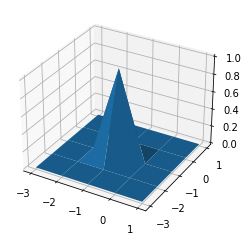

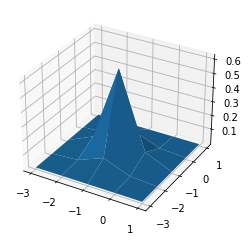

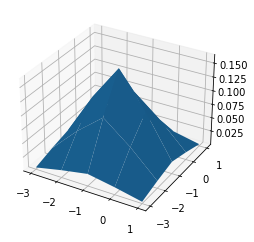

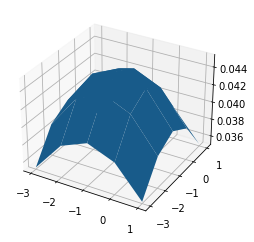

In [80]:
def fgaussian(size, sigma):
     m = n = size
     h, k = m//2, n//2
     x, y = np.mgrid[-h:h+1, -k:k+1]
     g = np.exp(-(x**2 + y**2)/(2*sigma**2))
     return g /g.sum() 
    
    
def mesh(fun, size):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    

    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun
    
    ax.plot_surface(X, Y, Z)
    
    plt.show()


for sigma in [0.1, 0.5, 1, 4]:
     kernel = fgaussian(5, sigma)
     mesh(kernel, 5)


(-0.5, 511.5, 511.5, -0.5)

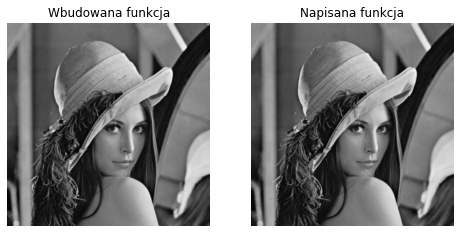

In [81]:
lena_blurred_func = cv2.GaussianBlur(lena, (5, 5), 0.5)
kernel = fgaussian(5, 0.5)
lena_blurred = lowpass_filter(lena, 5, 5, kernel)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 10))
ax1.imshow(lena_blurred_func, 'gray')
ax1.set_title('Wbudowana funkcja')
ax1.axis('off')
ax2.imshow(lena_blurred, 'gray')
ax2.set_title('Napisana funkcja')
ax2.axis('off')

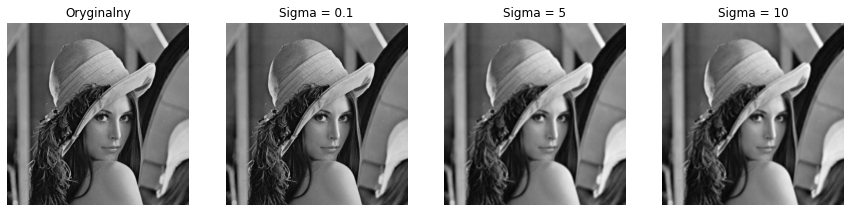

In [82]:
fig, axes = plt.subplots(1, 4, figsize = (15, 30))
axes[0].imshow(lena, 'gray')
axes[0].set_title('Oryginalny')
axes[0].axis('off')
sigma = [0.1, 5, 10]
for i in range(len(sigma)):
    kernel = fgaussian(5, sigma[i])
    dst = lowpass_filter(lena, 5, 5, kernel)
    axes[i+1].imshow(dst, 'gray')
    axes[i+1].set_title(f'Sigma = {sigma[i]}')
    axes[i+1].axis('off')

### Filtry nieliniowe -- mediana

Filtry rozmywające redukują szum, ale niekorzystnie wpływają na ostrość obrazu.
Dlatego często wykorzystuje się filtry nieliniowe - np. filtr medianowy (dla przypomnienia: mediana - środkowa wartość w posortowanym ciągu liczb).

Podstawowa różnica pomiędzy filtrami liniowymi, a nieliniowymi polega na tym, że przy filtracji liniowej na nową wartość piksela ma wpływ wartość wszystkich pikseli z otoczenia (np. uśrednianie, czasem ważone), natomiast w przypadku filtracji nieliniowej jako nowy piksel wybierana jest któraś z wartości otoczenia - według jakiegoś wskaźnika (wartość największa, najmniejsza czy właśnie mediana).


1. Wczytaj obraz _lenaSzum.png_ (losowe 10% pikseli białych lub czarnych - tzw. zakłócenia impulsowe). Przeprowadź filtrację uśredniającą z rozmiarem maski 3x3. Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Wykorzystując funkcję ``cv2.medianBlur` wykonaj filtrację medianową _lenaSzum.png_ (z rozmiarem maski $3 \times 3$). Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Która filtracja lepiej radzi sobie z tego typu szumem?

  Uwaga. Taki sam efekt da również użycie funkcji `signal.medfilt2d`.


(-0.5, 511.5, 511.5, -0.5)

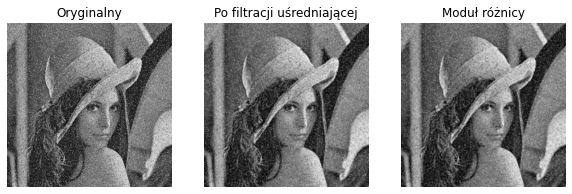

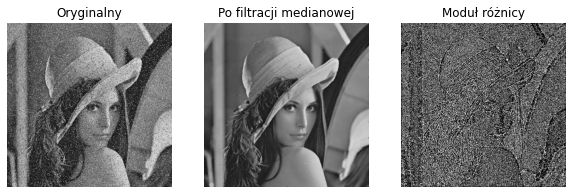

In [83]:
src = cv2.imread('lenaSzum.png', cv2.IMREAD_GRAYSCALE)

dst = lowpass_filter(src, 3, 3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 20))
ax1.imshow(src, 'gray')
ax1.set_title('Oryginalny')
ax1.axis('off')
ax2.imshow(dst, 'gray')
ax2.set_title('Po filtracji uśredniającej')
ax2.axis('off')
ax3.imshow(np.abs(src - dst), 'gray')
ax3.set_title('Moduł różnicy')
ax3.axis('off')

dst = signal.medfilt2d(src, 3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 20))
ax1.imshow(src, 'gray')
ax1.set_title('Oryginalny')
ax1.axis('off')
ax2.imshow(dst, 'gray')
ax2.set_title('Po filtracji medianowej')
ax2.axis('off')
ax3.imshow(np.abs(src - dst), 'gray')
ax3.set_title('Moduł różnicy')
ax3.axis('off')

2. Przeprowadź filtrację uśredniającą, a następnie medianową obrazu _lena.png_.
   Wyniki porównaj - dla obu wyświetl: oryginał, wynik filtracji i moduł z różnicy.
   Szczególną uwagę zwróć na ostrość i krawędzie.
   W której filtracji krawędzie zostają lepiej zachowane?

(-0.5, 511.5, 511.5, -0.5)

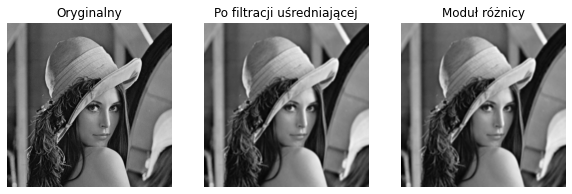

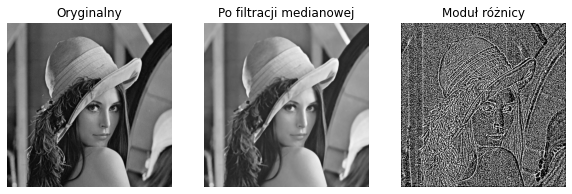

In [84]:
src = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

dst = lowpass_filter(src, 5, 5)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 20))
ax1.imshow(src, 'gray')
ax1.set_title('Oryginalny')
ax1.axis('off')
ax2.imshow(dst, 'gray')
ax2.set_title('Po filtracji uśredniającej')
ax2.axis('off')
ax3.imshow(np.abs(src - dst), 'gray')
ax3.set_title('Moduł różnicy')
ax3.axis('off')

dst = signal.medfilt2d(src, 5)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 20))
ax1.imshow(src, 'gray')
ax1.set_title('Oryginalny')
ax1.axis('off')
ax2.imshow(dst, 'gray')
ax2.set_title('Po filtracji medianowej')
ax2.axis('off')
ax3.imshow(np.abs(src - dst), 'gray')
ax3.set_title('Moduł różnicy')
ax3.axis('off')

3. Ciekawy efekt można uzyskać wykonując filtrację medianową wielokrotnie. Określa się go mianem  posteryzacji.  W wyniku przetwarzania z obrazka usunięte zostają detale, a duże obszary uzyskują tą samą wartość jasności.  Wykonaj operację mediany $5 \times 5$ na obrazie _lena.png_ 10-krotnie. (wykorzystaj np. pętlę `for`).


Inne filtry nieliniowe:
- filtr modowy - moda (dominanta) zamiast mediany,
- filtr olimpijski - średnia z podzbioru otoczenia (bez wartości ekstremalnych),
- hybrydowy filtr medianowy - mediana obliczana osobno w różnych podzbiorach otoczenia (np. kształt ``x'',``+''), a jako wynik brana jest mediana ze zbioru wartość elementu centralnego, mediana z ``x'' i mediana z ``+'',
- filtr minimalny i maksymalny (będą omówione przy okazji operacji morfologicznych w dalszej części kursu).


Warto zdawać sobie sprawę, z szerokich możliwości dopasowywania rodzaju filtracji do konkretnego rozważanego problemu i rodzaju zaszumienia występującego na obrazie.

(-0.5, 511.5, 511.5, -0.5)

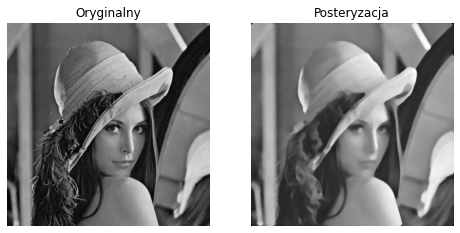

In [85]:
lena = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
src = lena
for i in range(10):
    dst = signal.medfilt2d(src, 5)
    src = dst

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 10))
ax1.imshow(lena, 'gray')
ax1.set_title('Oryginalny')
ax1.axis('off')
ax2.imshow(src, 'gray')
ax2.set_title('Posteryzacja')
ax2.axis('off')

## Filtry liniowe górnoprzepustowe (wyostrzające, wykrywające krawędzie)

Zadaniem filtrów górnoprzepustowych jest wydobywanie z obrazu składników odpowiedzialnych za szybkie zmiany jasności - konturów, krawędzi, drobnych elementów tekstury.

### Laplasjan (wykorzystanie drugiej pochodnej obrazu)

1. Wczytaj obraz _moon.png_.

2. Wprowadź podstawową maskę laplasjanu:
\begin{equation}
M = 
\begin{bmatrix}
0 & 1& 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0
\end{bmatrix}
\end{equation}

3. Przed rozpoczęciem obliczeń należy dokonać normalizacji maski - dla rozmiaru $3 \times 3$ podzielić każdy element przez 9.
   Proszę zwrócić uwagę, że nie można tu zastosować takiej samej normalizacji, jak dla filtrów dolnoprzepustowanych, gdyż skutkowałby to dzieleniem przez 0.

4. Wykonaj konwolucję obrazu z maską (`c2.filter2D`). Przed wyświetleniem, wynikowy obraz należy poddać normalizacji (występują ujemne wartości). Najczęściej wykonuje się jedną z dwóch operacji:
- skalowanie (np. poprzez dodatnie 128 do każdego z pikseli),
- moduł (wartość bezwzględna).

Wykonaj obie normalizacje. 
Na wspólnym wykresie wyświetl obraz oryginalny oraz przefiltrowany po obu normalizacjach. 

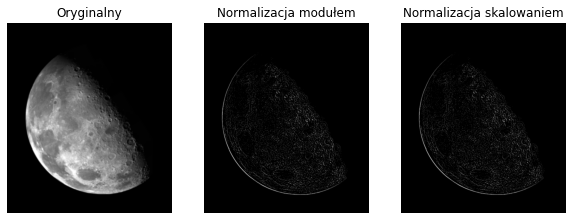

In [136]:
src = cv2.imread('moon.png', cv2.IMREAD_GRAYSCALE)
M = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
M = M/9

def laplasjan(src, M):
    dst = cv2.filter2D(src, None,  M).astype('int64')
    dst1 = np.abs(dst)
    Y, X = dst.shape
    dst2 = np.zeros((Y, X))
    for i in range(Y):
        for j in range(X):
            dst2[i][j] = dst[i][j] + 128

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 20))
    ax1.imshow(src, 'gray')
    ax1.set_title('Oryginalny')
    ax1.axis('off')
    ax2.imshow(dst1, 'gray')
    ax2.set_title('Normalizacja modułem')
    ax2.axis('off')
    ax3.imshow(dst2, 'gray')
    ax3.set_title('Normalizacja skalowaniem')
    ax3.axis('off')

    return dst1, dst2

dst1, dst2 = laplasjan(src, M)



7. Efekt wyostrzenia uzyskuje się po odjęciu/dodaniu (zależy do maski) rezultatu filtracji laplasjanowej i oryginalnego obrazu. Wyświetl na jednym wykresie: obraz oryginalny, sumę oryginału i wyniku filtracji oraz różnicę (bezwzględną) oryginału i wyniku filtracji.
 Uwaga. Aby uniknąć artefaktów, należy obraz wejściowy przekonwertować do formatu ze znakiem.



(-0.5, 465.5, 539.5, -0.5)

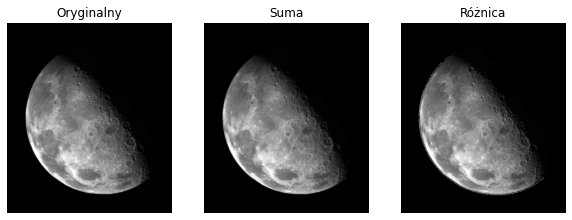

In [128]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 20))
ax1.imshow(src, 'gray')
ax1.set_title('Oryginalny')
ax1.axis('off')
ax2.imshow(dst1 + src, 'gray')
ax2.set_title('Suma')
ax2.axis('off')
ax3.imshow(np.abs(src - dst1), 'gray')
ax3.set_title('Różnica')
ax3.axis('off')

### Gradienty (wykorzystanie pierwszej pochodnej obrazu)

1. Wczytaj obraz _kw.png_. Stwórz odpowiednie maski opisane w kolejnych punktach i dokonaj filtracji.
2. Wykorzystując gradient Robertsa przeprowadź detekcję krawędzi - poprzez wykonanie konwolucji obrazu z daną maską:
\begin{equation}
R1 = \begin{bmatrix} 0 & 0 & 0 \\ -1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}   
R2 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix}
\end{equation}

Wykorzystaj stworzony wcześniej kod (przy laplasjanie) - dwie metody normalizacji oraz sposób wyświetlania.

3. Analogicznie przeprowadź detekcję krawędzi za pomocą gradientu Prewitta (pionowy i poziomy)
\begin{equation}
P1 = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}   
P2 = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}
\end{equation}

4. Podobnie skonstruowany jest gradient Sobela (występuje osiem masek, zaprezentowane są dwie ``prostopadłe''):
\begin{equation}
S1 = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}   
S2 = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
\end{equation}

Przeprowadź detekcję krawędzi za pomocą gradientu Sobela. 

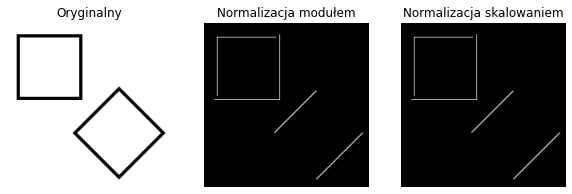

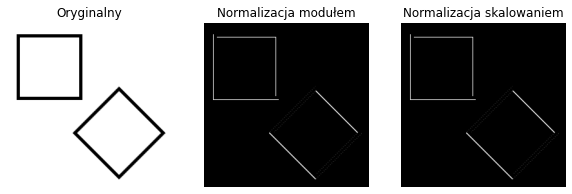

In [129]:
#Gradient Robertsa
src = cv2.imread('kw.png', cv2.IMREAD_GRAYSCALE)

R1 = np.array([[0, 0, 0], [-1, 0, 0], [0, 1, 0]])
R2 = np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]])

dst1, dst2 = laplasjan(src, R1)
dst1, dst2 = laplasjan(src, R2)

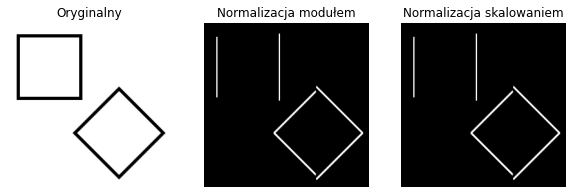

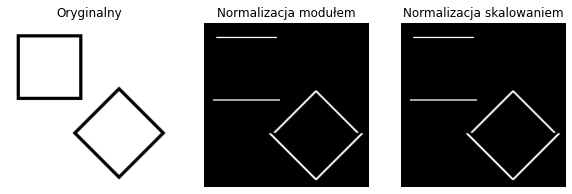

In [130]:
#Gradienty Prewitta
src = cv2.imread('kw.png', cv2.IMREAD_GRAYSCALE)

P1 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
P2 = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

dst1, dst2 = laplasjan(src, P1)
dst1, dst2 = laplasjan(src, P2)

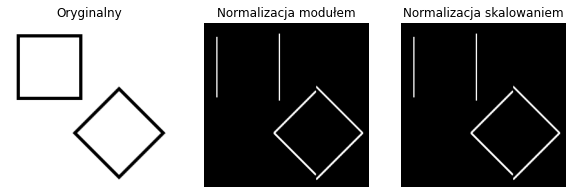

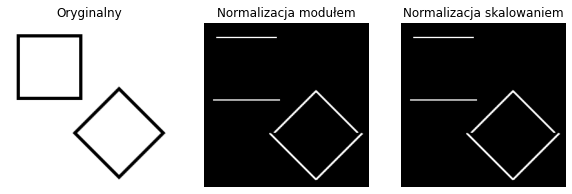

In [131]:
#Gradienty Sobela
src = cv2.imread('kw.png', cv2.IMREAD_GRAYSCALE)

S1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
S2 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

dst1, dst2 = laplasjan(src, S1)
dst1, dst2 = laplasjan(src, S2)

5. Na podstawie dwóch ortogonalnych masek np. Sobela można stworzyć tzw. filtr kombinowany - pierwiastek kwadratowy z sumy kwadratów gradientów:
\begin{equation}
OW = \sqrt{(O * S1)^2 + (O * S2)^2}
\end{equation}
gdzie:  $OW$ - obraz wyjściowy, $O$ - obraz oryginalny (wejściowy), $S1,S2$ - maski Sobela, $*$ - operacja konwolucji.

Zaimplementuj filtr kombinowany.

Uwaga. Proszę zwrócić uwagę na konieczność zmiany formatu danych obrazu wejściowego - na typ znakiem



(-0.5, 255.5, 255.5, -0.5)

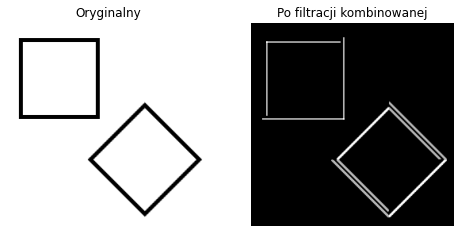

In [151]:
S1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
S2 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

src = cv2.imread('kw.png', cv2.IMREAD_GRAYSCALE)

O_S1 = cv2.filter2D(src, -1, S1).astype('int64')
O_S2 = cv2.filter2D(src, -1, S2).astype('int64')

OW = np.sqrt(np.power(O_S1, 2) + np.power(O_S2, 2))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 15))
ax1.imshow(src, 'gray')
ax1.set_title('Oryginalny')
ax1.axis('off')
ax2.imshow(OW, 'gray')
ax2.set_title('Po filtracji kombinowanej')
ax2.axis('off')

6. Istnieje alternatywna wersja filtra kombinowanego, która zamiast pierwiastka z sumy kwadratów wykorzystuje sumę modułów (prostsze obliczenia). 
Zaimplementuj tę wersję. 

(-0.5, 255.5, 255.5, -0.5)

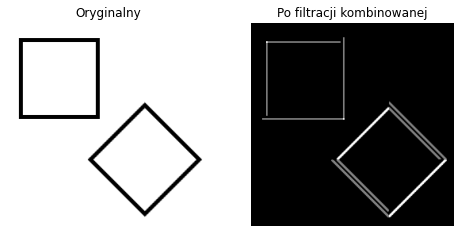

In [152]:
OW = np.abs(O_S1) + np.abs(O_S2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 15))
ax1.imshow(src, 'gray')
ax1.set_title('Oryginalny')
ax1.axis('off')
ax2.imshow(OW, 'gray')
ax2.set_title('Po filtracji kombinowanej')
ax2.axis('off')

7. Wczytaj plik _jet.png_ (zamiast _kw.png_).
Sprawdź działanie obu wariantów filtracji kombinowanej.

(-0.5, 511.5, 511.5, -0.5)

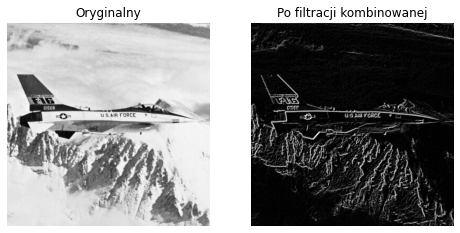

In [145]:
src = cv2.imread('jet.png', cv2.IMREAD_GRAYSCALE)

O_S1 = cv2.filter2D(src, -1, S1).astype('int64')
O_S2 = cv2.filter2D(src, -1, S2).astype('int64')

OW = np.sqrt(np.power(O_S1, 2) + np.power(O_S2, 2))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 15))
ax1.imshow(src, 'gray')
ax1.set_title('Oryginalny')
ax1.axis('off')
ax2.imshow(OW, 'gray')
ax2.set_title('Po filtracji kombinowanej')
ax2.axis('off')

(-0.5, 511.5, 511.5, -0.5)

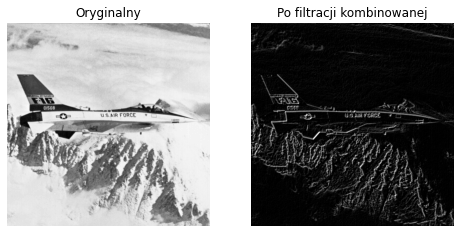

In [148]:
OW = np.abs(O_S1) + np.abs(O_S2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 15))
ax1.imshow(src, 'gray')
ax1.set_title('Oryginalny')
ax1.axis('off')
ax2.imshow(OW, 'gray')
ax2.set_title('Po filtracji kombinowanej')
ax2.axis('off')